# Overfitting in Classification - Example using Logistic Regression
In regression, overfitting typically corresponded to an approximation way to accurate on the training set that performed badly on the test set. In classification, overfitting has the same effect, good performance on the train and bad performance on the test. 

First we load the usual libraries.

In [1]:
import numpy as np
import math
import matplotlib
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
import sklearn.datasets.samples_generator
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold

#from sklearn.model_evaluation import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\talip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


We generate two moon-shaped groups of points labeled differently and plot them.

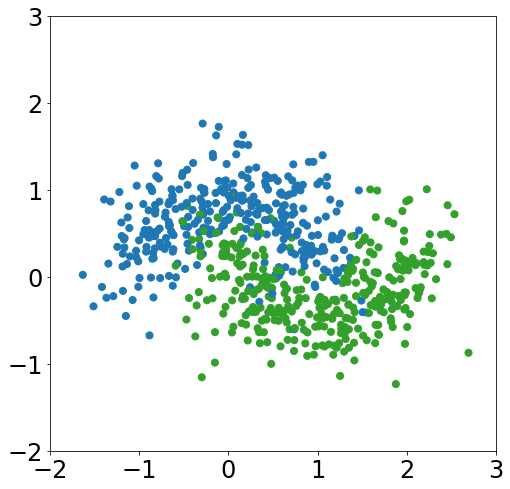

In [5]:
### Color maps for plotting
data_points_cm = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[1],plt.cm.Paired.colors[3]], name='DataPointsColorMap')
ds_points_cm = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[0],plt.cm.Paired.colors[2]], name='DecisionSurfaceColorMap')

### 
mx,my = datasets.samples_generator.make_moons(n_samples=1000, noise=0.3, random_state=1234)

train_x, test_x, train_y, test_y = model_selection.train_test_split(mx, my, test_size=0.33, random_state=42)

plt.figure(1, figsize=(8, 8))
font = {'family':'sans', 'size':24}
plt.rc('font', **font)
plt.xlim([-2,3])
plt.ylim([-2,3])
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap=data_points_cm, s=50);

First, we apply plain logistic regression which generates a decision hyperplane. Since we are dealing with two variables only, and thus we are in a 2D space, the hyperplane is actually a line.

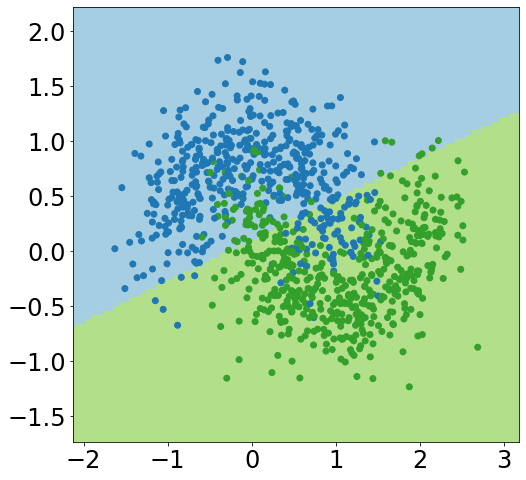

In [7]:
logistic = linear_model.LogisticRegression(C=10e10, solver="liblinear")
logistic.fit(train_x,train_y)
xval = model_selection.cross_val_score(logistic,mx,my)
#print("Degree %d - Mean Accuracy = %.3f +/ %3f"%(degree,mu,sigma))

yp = logistic.predict(mx)

def PlotDecisionBoundaries(model, x, y):
    '''given a model and the dataset (x are the input variables, y is the predicted label)
    it plots the decision boundaries.'''
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x0_min, x0_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    x1_min, x1_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    
    h = min((x0_max-x0_min),(x1_max-x1_min))/100.0
    
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    Z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx0.shape)

    plt.figure(1, figsize=(8, 8))
    font = {'family':'sans', 'size':24}
    plt.rc('font', **font)
    plt.pcolormesh(xx0, xx1, Z, cmap=ds_points_cm)
    plt.scatter(x[:,0],x[:,1],c=y, cmap=data_points_cm)   
    
PlotDecisionBoundaries(logistic, mx, my)

Next we generate polynomials of increasing degrees, compute a model using simple logistic regression, and evaluate each model using crossvalidation.

In [8]:
degrees = range(2,13)
mu = np.zeros(len(degrees))
sigma = np.zeros(len(degrees))

for i,d in enumerate(degrees):
    poly = PolynomialFeatures(d)
    px = poly.fit_transform(mx)
    px = px[:,1:]    
    logistic = linear_model.LogisticRegression(C=1e10,solver="liblinear",max_iter=1000)
    logistic.fit(px,my)
    xval = model_selection.cross_val_score(logistic,px,my,cv=StratifiedKFold(10,shuffle=True,random_state=1234))
    mu[i] = np.average(xval)
    sigma[i] = np.std(xval)


C:\Users\talip\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\talip\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


We plot the mean accuracy for each degree of the polynomial. Note that the best performance is reached for a polynomial of degree 3.

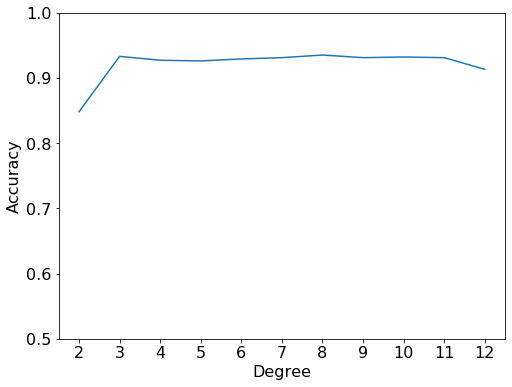

In [9]:
plt.figure(1, figsize=(8, 6))
font = {'family':'sans', 'size':16}
plt.rc('font', **font)

plt.xticks(degrees)
plt.ylim([0.5,1.0])
plt.ylabel('Accuracy')
plt.xlabel('Degree')
plt.plot(degrees,mu);

In [10]:
def PlotPolynomialDecisionBoundaries(model, x, y, d=1):
    '''given a model and the dataset (x are the input variables, y is the predicted label)
    it plots the decision boundaries.'''
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x0_min, x0_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    x1_min, x1_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    
    h = min((x0_max-x0_min),(x1_max-x1_min))/100.0
    
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    
    #Z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    poly = PolynomialFeatures(d)
    new_x = poly.fit_transform(np.c_[xx0.ravel(),xx1.ravel()])
    new_x = new_x[:,1:]
    
    Z = model.predict(new_x)

    # Put the result into a color plot
    Z = Z.reshape(xx0.shape)

    plt.figure(1, figsize=(8, 6))
    font = {'family':'sans', 'size':24}
    plt.rc('font', **font)
    plt.pcolormesh(xx0, xx1, Z, cmap=ds_points_cm)
    plt.scatter(mx[:,0],mx[:,1],c=my, cmap=data_points_cm, s=50)  

First, let's check out the decision plane for the best model.

Degree 3 - Mean Accuracy = 0.933 +/ 0.030348


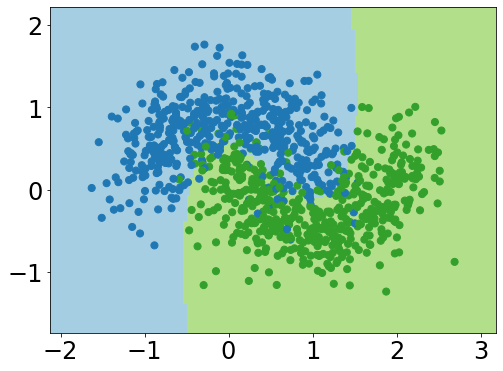

In [11]:
degree = 3
poly = PolynomialFeatures(degree)
px = poly.fit_transform(mx)
px = px[:,1:]
logistic = linear_model.LogisticRegression(C=10e10, solver="liblinear")
xval = model_selection.cross_val_score(logistic, px, my)

logistic.fit(px,my)
PlotPolynomialDecisionBoundaries(logistic, px, my,degree)

xval = model_selection.cross_val_score(logistic,px,my,cv=StratifiedKFold(10,shuffle=True,random_state=1234))

mu = np.average(xval)
sigma = np.std(xval)

print("Degree %d - Mean Accuracy = %.3f +/ %3f"%(degree,mu,sigma))

Next, we plot the decision boundary for one of the worst performing configurations (a polynomial of degree 20)

Degree 10 - Mean Accuracy = 0.666 +/ 0.023324


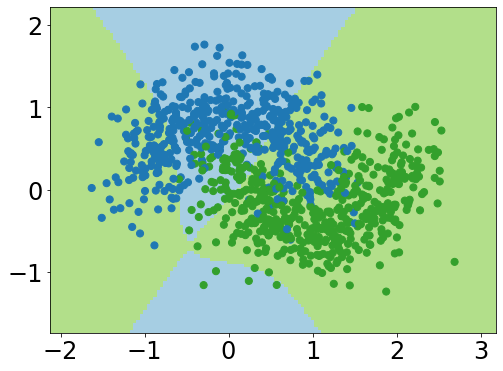

In [22]:
degree = 10
poly = PolynomialFeatures(degree, include_bias=False)
px = poly.fit_transform(mx)
# px = px[:,1:]
logistic = linear_model.LogisticRegression(C=0.00000001, solver="liblinear", max_iter=1000)
logistic.fit(px,my)
PlotPolynomialDecisionBoundaries(logistic, px, my,degree)

xval = model_selection.cross_val_score(logistic,px,my,cv=StratifiedKFold(10,shuffle=True,random_state=1234))

mu = np.average(xval)
sigma = np.std(xval)

print("Degree %d - Mean Accuracy = %.3f +/ %3f"%(degree,mu,sigma))

Degree 20 - Mean Accuracy = 0.770 +/ 0.040249


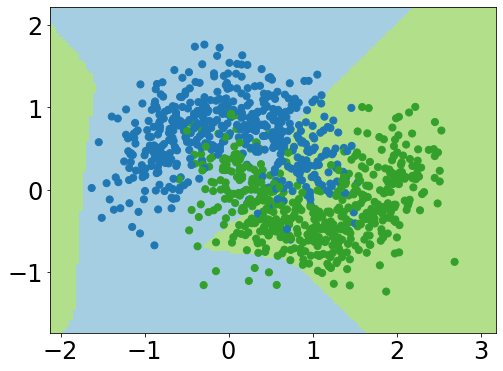

In [16]:
degree = 20
poly = PolynomialFeatures(degree, include_bias=False)
px = poly.fit_transform(mx)
# px = px[:,1:]
logistic = linear_model.LogisticRegression(C=10, solver="liblinear", max_iter=10000)
logistic.fit(px,my)
PlotPolynomialDecisionBoundaries(logistic, px, my,degree)

xval = model_selection.cross_val_score(logistic,px,my,cv=StratifiedKFold(10,shuffle=True,random_state=1234))

mu = np.average(xval)
sigma = np.std(xval)

print("Degree %d - Mean Accuracy = %.3f +/ %3f"%(degree,mu,sigma))